In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
# %matplotlib inline

In [20]:
# import argparse
# parser = argparse.ArgumentParser(description='manual to this script')
# parser.add_argument('--epoch_size',type=int,default=10)
# parser.add_argument('--batch_size',type=int,default=360)
# args = parser.parse_args()
# epoch_size = args.epoch_size
# batch_size = args.batch_size
# print("epoch=%s,batch_size=%s"%(epoch_size,batch_size))

In [63]:
epoch_size = 100
batch_size = 360
print("epoch=%s,batch_size=%s"%(epoch_size,batch_size))

epoch=100,batch_size=360


In [22]:
months=13
DIR_ROOT = "/Users/stardust/StardustJavaProjects/JavaTest";

In [23]:
data_bed = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}bed_level.txt.csv".format(i),header=None)
    data_.columns = ['x','y','bed_level']
    data_bed.append(data_)

In [24]:
len(data_bed)

13

In [25]:
data_bed[12]

,x,y,bed_level
0,518693.195313,3.368709e+06,20.538614
1,518732.648438,3.368797e+06,21.723602
2,518775.289063,3.368875e+06,20.020536
3,518825.367188,3.368948e+06,22.505301
4,518882.789063,3.369016e+06,24.735243
...,...,...,...
35995,527137.609375,3.382640e+06,24.382263
35996,527168.234375,3.382688e+06,24.036366
35997,527196.937500,3.382736e+06,24.412762
35998,527224.312500,3.382784e+06,24.797714


In [26]:
data_ = []
data_.append(data_bed[4].iloc[30100:30103])
data_.append(data_bed[4].iloc[30103:30106])
data_

[                   x             y  bed_level
 30100  522042.382813  3.373878e+06   1.290496
 30101  522061.484375  3.373906e+06   1.910207
 30102  522081.414063  3.373936e+06   2.595494,
                    x             y  bed_level
 30103  522102.250000  3.373968e+06   3.270399
 30104  522124.039063  3.374001e+06   3.694517
 30105  522146.820313  3.374036e+06   3.781859]

In [27]:
data_bed.count

<function list.count(value, /)>

In [28]:
data_sedmiment = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}sediment_concentration.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','sand_z','concentration']
    data_sedmiment.append(data_)
data_sedmiment[4].iloc[30100:30200,:]

,x,y,sand_z,concentration
30100,522042.382813,3.373878e+06,6.676435,0.009027
30101,522061.484375,3.373906e+06,6.985826,0.011448
30102,522081.414063,3.373936e+06,7.327604,0.015275
30103,522102.250000,3.373968e+06,7.663913,0.021059
30104,522124.039063,3.374001e+06,7.874988,0.025316
...,...,...,...,...
30195,526429.359375,3.380550e+06,8.695766,0.001340
30196,526444.468750,3.380588e+06,8.839143,0.001267
30197,526459.171875,3.380626e+06,9.053247,0.001326
30198,526473.546875,3.380663e+06,9.320088,0.001703


In [29]:
data_sedmiment[4].count

<bound method DataFrame.count of                    x             y     sand_z  concentration
0      518693.195313  3.368709e+06  20.538614            0.0
1      518732.648438  3.368797e+06  21.723602            0.0
2      518775.289063  3.368875e+06  20.020536            0.0
3      518825.367188  3.368948e+06  22.505301            0.0
4      518882.789063  3.369016e+06  24.735243            0.0
...              ...           ...        ...            ...
35995  527137.609375  3.382640e+06  24.382263            0.0
35996  527168.234375  3.382688e+06  24.036366            0.0
35997  527196.937500  3.382736e+06  24.412762            0.0
35998  527224.312500  3.382784e+06  24.797714            0.0
35999  527250.968750  3.382832e+06  24.585445            0.0

[36000 rows x 4 columns]>

In [30]:
data_velocity = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}velocity.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','x_velocity','y_velocity','xy_velocity']
    data_velocity.append(data_)
data_velocity[4].iloc[30100:30200,:]

,x,y,x_velocity,y_velocity,xy_velocity
30100,522042.382813,3.373878e+06,0.397100,0.496184,0.635521
30101,522061.484375,3.373906e+06,0.404101,0.503862,0.645890
30102,522081.414063,3.373936e+06,0.414820,0.513693,0.660269
30103,522102.250000,3.373968e+06,0.426268,0.519740,0.672186
30104,522124.039063,3.374001e+06,0.430343,0.520641,0.675471
...,...,...,...,...,...
30195,526429.359375,3.380550e+06,0.310145,0.348087,0.466213
30196,526444.468750,3.380588e+06,0.292949,0.353607,0.459192
30197,526459.171875,3.380626e+06,0.276159,0.366597,0.458974
30198,526473.546875,3.380663e+06,0.267360,0.382961,0.467055


In [31]:
data_water_depth = []
for i in range(1,months+1):
    data_ = pd.read_csv(DIR_ROOT + "/{}water_depth.xyz.csv".format(i),header=None)
    data_.columns = ['x','y','water_depth']
    data_water_depth.append(data_)
data_water_depth[4].iloc[30100:30200,:]

,x,y,water_depth
30100,522042.382813,3.373878e+06,10.771878
30101,522061.484375,3.373906e+06,10.151239
30102,522081.414063,3.373936e+06,9.464220
30103,522102.250000,3.373968e+06,8.787028
30104,522124.039063,3.374001e+06,8.360943
...,...,...,...
30195,526429.359375,3.380550e+06,6.401565
30196,526444.468750,3.380588e+06,6.114544
30197,526459.171875,3.380626e+06,5.685476
30198,526473.546875,3.380663e+06,5.149618


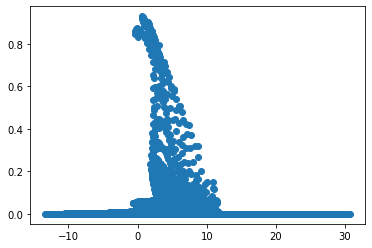

In [32]:
plt.scatter(data_bed[4].iloc[:,2],data_sedmiment[4].iloc[:,3])

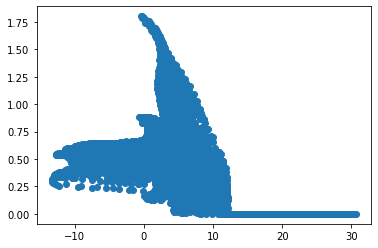

In [33]:
plt.scatter(data_bed[4].iloc[:,2],data_velocity[4].iloc[:,4])

In [34]:
data_sedmiment[4].iloc[0:3,3]

0    0.0
1    0.0
2    0.0
Name: concentration, dtype: float64

In [35]:
data_bed[4].iloc[0:3,2]

0    20.538614
1    21.723602
2    20.020536
Name: bed_level, dtype: float64

In [36]:
data_all = []
for i in range(0,months):
    print(i)
    data_ = pd.concat([data_bed[i],data_sedmiment[i].iloc[:,2:4],data_velocity[i].iloc[:,2:5],data_water_depth[i].iloc[:,2]],axis=1)
    data_all.append(data_)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [37]:
data_all[:100]

[                   x             y  bed_level     sand_z  concentration  \
 0      518693.195313  3.368709e+06  20.538614  20.538614            0.0   
 1      518732.648438  3.368797e+06  21.723602  21.723602            0.0   
 2      518775.289063  3.368875e+06  20.020536  20.020536            0.0   
 3      518825.367188  3.368948e+06  22.505301  22.505301            0.0   
 4      518882.789063  3.369016e+06  24.735243  24.735243            0.0   
 ...              ...           ...        ...        ...            ...   
 35995  527137.609375  3.382640e+06  24.382263  24.382263            0.0   
 35996  527168.234375  3.382688e+06  24.036366  24.036366            0.0   
 35997  527196.937500  3.382736e+06  24.412762  24.412762            0.0   
 35998  527224.312500  3.382784e+06  24.797714  24.797714            0.0   
 35999  527250.968750  3.382832e+06  24.585445  24.585445            0.0   
 
        x_velocity  y_velocity  xy_velocity  water_depth  
 0             0.0         

In [38]:
len(data_all)

13

In [84]:
step_len = 11
predict_len = 1
data_len = 36000

In [85]:
data_all[1].iloc[8640]

x                5.184564e+05
y                3.368884e+06
bed_level        4.233002e+00
sand_z           8.097850e+00
concentration    0.000000e+00
x_velocity       2.575530e-01
y_velocity       2.828840e-01
xy_velocity      3.825660e-01
water_depth      7.729696e+00
Name: 8640, dtype: float64

In [86]:
data_step = []
for i in range(0,months-step_len-predict_len+1):
    print(i)
    for index, row in data_all[i].iterrows():
        data_ = []
        for j in range(0,step_len+predict_len):
            data_.append(data_all[i+j].iloc[index])
        data_step.append(data_)

0
1


In [87]:
data_step[8640:8643]

[[x                5.184564e+05
  y                3.368884e+06
  bed_level        2.487651e+00
  sand_z           7.235242e+00
  concentration    0.000000e+00
  x_velocity       2.318120e-01
  y_velocity       2.495560e-01
  xy_velocity      3.406100e-01
  water_depth      9.495181e+00
  Name: 8640, dtype: float64,
  x                5.184564e+05
  y                3.368884e+06
  bed_level        4.233002e+00
  sand_z           8.097850e+00
  concentration    0.000000e+00
  x_velocity       2.575530e-01
  y_velocity       2.828840e-01
  xy_velocity      3.825660e-01
  water_depth      7.729696e+00
  Name: 8640, dtype: float64,
  x                5.184564e+05
  y                3.368884e+06
  bed_level        5.726032e+00
  sand_z           8.880440e+00
  concentration    3.495000e-02
  x_velocity       4.312960e-01
  y_velocity       4.931630e-01
  xy_velocity      6.551530e-01
  water_depth      6.308815e+00
  Name: 8640, dtype: float64,
  x                5.184564e+05
  y           

In [88]:
data_step = np.array(data_step)

In [89]:
data_step.shape

(72000, 12, 9)

In [90]:
x = data_step[:, :-predict_len, :]
y = data_step[:, -predict_len, 2]

In [91]:
x.shape,y.shape

((72000, 11, 9), (72000,))

In [92]:
x[0:3],y[0:3],months,len(data_all)

(array([[[5.18693195e+05, 3.36870919e+06, 2.05386140e+01, 2.05386140e+01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [5.18693195e+05, 3.36870919e+06, 2.05386140e+01, 2.05386140e+01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [5.18693195e+05, 3.36870919e+06, 2.05386140e+01, 2.05386140e+01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [5.18693195e+05, 3.36870919e+06, 2.05386140e+01, 2.05386140e+01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [5.18693195e+05, 3.36870919e+06, 2.05386140e+01, 2.05386140e+01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [5.18693195e+05, 3.36870919e+06, 2.05386140e+01, 2.05386140e+01,
          0.00000000e+00, 0.00000000e+00, 0.0000000

In [93]:
split=36000 * (12 - step_len)

In [94]:
train_x = x[:split]
train_y = y[:split]
test_x = x[split:]
test_y = y[split:]

In [95]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((36000, 11, 9), (36000,), (36000, 11, 9), (36000,))

In [96]:
train_x[8640:8643],train_y[8640:8643]

(array([[[ 5.18456367e+05,  3.36888400e+06,  2.48765100e+00,
           7.23524200e+00,  0.00000000e+00,  2.31812000e-01,
           2.49556000e-01,  3.40610000e-01,  9.49518100e+00],
         [ 5.18456367e+05,  3.36888400e+06,  4.23300200e+00,
           8.09785000e+00,  0.00000000e+00,  2.57553000e-01,
           2.82884000e-01,  3.82566000e-01,  7.72969600e+00],
         [ 5.18456367e+05,  3.36888400e+06,  5.72603200e+00,
           8.88044000e+00,  3.49500000e-02,  4.31296000e-01,
           4.93163000e-01,  6.55153000e-01,  6.30881500e+00],
         [ 5.18456367e+05,  3.36888400e+06,  6.74817200e+00,
           9.38390500e+00,  7.57100000e-02,  4.90321000e-01,
           5.27653000e-01,  7.20300000e-01,  5.27146500e+00],
         [ 5.18456367e+05,  3.36888400e+06,  7.42556700e+00,
           9.79510200e+00,  4.19248000e-01,  6.96327000e-01,
           7.39715000e-01,  1.01589900e+00,  4.73906900e+00],
         [ 5.18456367e+05,  3.36888400e+06,  7.04962100e+00,
           9.698656

In [97]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)
train_max = train_x.max(axis=0)
train_min = train_x.min(axis=0)
mean.shape

(11, 9)

In [98]:
train_x = (train_x - mean)/(train_max - train_min)
test_x = (test_x - mean)/(train_max - train_min)
train_x[:1],train_y[:1]

<ipython-input-98-c44144914fd7>:1: RuntimeWarning: invalid value encountered in true_divide
  train_x = (train_x - mean)/(train_max - train_min)
<ipython-input-98-c44144914fd7>:2: RuntimeWarning: divide by zero encountered in true_divide
  test_x = (test_x - mean)/(train_max - train_min)
<ipython-input-98-c44144914fd7>:2: RuntimeWarning: invalid value encountered in true_divide
  test_x = (test_x - mean)/(train_max - train_min)


(array([[[-0.39807338, -0.39537868,  0.26363229,  0.28688757,
                  nan, -0.2461573 , -0.39040291, -0.43387452,
          -0.20569996],
         [-0.39807338, -0.39537868,  0.26316144,  0.28665757,
          -0.00097034, -0.24720468, -0.37841449, -0.37605538,
          -0.20462084],
         [-0.39807338, -0.39537868,  0.26276395,  0.28594352,
          -0.01393752, -0.19937382, -0.2939434 , -0.29084703,
          -0.20504469],
         [-0.39807338, -0.39537868,  0.26223012,  0.28562931,
          -0.00734804, -0.16737063, -0.23805133, -0.23444294,
          -0.20396009],
         [-0.39807338, -0.39537868,  0.26172769,  0.28438388,
          -0.01762387, -0.15483973, -0.22015066, -0.21742331,
          -0.20537349],
         [-0.39807338, -0.39537868,  0.26093011,  0.28299129,
          -0.07262515, -0.19566438, -0.26896376, -0.27261054,
          -0.20604895],
         [-0.39807338, -0.39537868,  0.2597959 ,  0.28157046,
          -0.1767775 , -0.22314798, -0.29551066, -

In [2]:
class LSTMModel(torch.nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
    def forward(self,inputs):
        return inputs

In [3]:
model = LSTMModel()
loss_function = nn.MSELoss()
optimzer = optim.SGD(model.parameters(), lr=0.1)

ValueError: optimizer got an empty parameter list

In [99]:
model = tf.keras.Sequential()
model.add(layers.LSTM(32,return_sequences=True, input_shape=(train_x.shape[1:]), ))
model.add(layers.LSTM(16,return_sequences=True))
model.add(layers.LSTM(8))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 11, 32)            5376      
_________________________________________________________________
lstm_10 (LSTM)               (None, 11, 16)            3136      
_________________________________________________________________
lstm_11 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 9,321
Trainable params: 9,321
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer='adam',
              loss='mae'
)

In [101]:
time_begin = time.time()
history = model.fit(train_x, train_y, batch_size = batch_size, epochs=epoch_size, verbose=1)
time_end = time.time()
print("fit cost time: %.2f s"%(time_end - time_begin))

Epoch 1/100
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 2/100
100/100 [==============================] - 1s 13ms/step - loss: nan
Epoch 3/100
100/100 [==============================] - 1s 13ms/step - loss: nan
Epoch 4/100
100/100 [==============================] - 1s 13ms/step - loss: nan
Epoch 5/100
100/100 [==============================] - 1s 13ms/step - loss: nan
Epoch 6/100
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 7/100
100/100 [==============================] - 1s 13ms/step - loss: nan
Epoch 8/100
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 9/100
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 10/100
100/100 [==============================] - 1s 13ms/step - loss: nan
Epoch 11/100
100/100 [==============================] - 1s 13ms/step - loss: nan
Epoch 12/100
100/100 [==============================] - 1s 14ms/step - loss: nan
Epoch 13/100
100/100 [===============

In [57]:
history.history.get('loss')[-5:]

[0.09103359282016754,
 0.08259595930576324,
 0.07807052880525589,
 0.07498586177825928,
 0.07201499491930008]

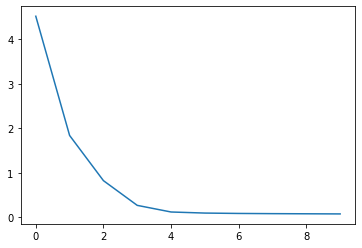

In [58]:
plt.plot(history.epoch, history.history.get('loss'))

In [59]:
test_x

array([[[-0.39807338, -0.39537868,  0.26056928, ..., -0.17671843,
         -0.18700768, -0.20276566],
        [-0.39807338, -0.39537868,  0.25971487, ..., -0.13649185,
         -0.18926459, -0.20134162],
        [-0.39807338, -0.39537868,  0.25887559, ..., -0.1370519 ,
         -0.19011908, -0.199914  ]],

       [[-0.39434865, -0.38915634,  0.28748348, ..., -0.17671843,
         -0.18700768, -0.20276566],
        [-0.39434865, -0.38915634,  0.28662907, ..., -0.13649185,
         -0.18926459, -0.20134162],
        [-0.39434865, -0.38915634,  0.28578979, ..., -0.1370519 ,
         -0.19011908, -0.199914  ]],

       [[-0.39032299, -0.38361996,  0.24880236, ..., -0.17671843,
         -0.18700768, -0.20276566],
        [-0.39032299, -0.38361996,  0.24794795, ..., -0.13649185,
         -0.18926459, -0.20134162],
        [-0.39032299, -0.38361996,  0.24710867, ..., -0.1370519 ,
         -0.19011908, -0.199914  ]],

       ...,

       [[ 0.40475638,  0.59784136,  0.34856139, ..., -0.1767184

In [60]:
result = model.predict(test_x, batch_size=36000)
result = pd.DataFrame(result)
result_y = pd.DataFrame(test_y)
result = pd.concat([result,result_y],axis=1)
result

,0,0
0,20.491644,20.538614
1,21.664911,21.723602
2,19.980944,20.020536
3,22.450285,22.505301
4,24.702627,24.735243
...,...,...
35995,24.333586,24.382263
35996,23.990685,24.036366
35997,24.362707,24.412762
35998,24.741245,24.797714


In [61]:
test_y

array([20.538614, 21.723602, 20.020536, ..., 24.412762, 24.797714,
       24.585445])

In [62]:
evaluate_result = model.evaluate(test_x,test_y)
print(evaluate_result)

1125/1125 [==============================] - 1s 843us/step - loss: 0.0454
0.04542456567287445


In [ ]:
result_save = pd.DataFrame(result)
result_save.to_csv(DIR_ROOT + "/SandWaterLSTMTest.csv")
print(result_save[8630:8670])